### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("dark")
sns.set_style("white")

### Reading data from the CSV file

In [2]:
emission_table = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

In [3]:
emission_table.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [4]:
pd.set_option('display.max_colwidth', -1)

In [5]:
by_category  = emission_table.groupby(['category'])

In [6]:
category_count = by_category.count()

In [7]:
category_count

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [8]:
strp = category_count.index

In [9]:
io = strp[0]
io[108]

't'

In [10]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [11]:
hdd = len(io)
hdd

109

In [12]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [13]:
# Here we get success
io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [14]:
new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [15]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [16]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [17]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [18]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [19]:
category_count["Shorted_category"] = short_category

In [20]:
category_count

,country_or_area,year,value,Shorted_category
category,,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,co2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949,ghg(indirect co2)
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ghg
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975,hfc
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ch4
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248,nf3
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,n2o
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831,pfc
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032,sf6


### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [21]:
trying_emission = emission_table

In [22]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [23]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [24]:
l.count()

,category,country_or_area,year,value
0,CH4,1074,1074,1074
1,CO2,1074,1074,1074
2,GHG,1074,1074,1074
3,GHG(Indirect CO2),949,949,949
4,HFC,975,975,975
5,HFC+PFC,75,75,75
6,N2O,1074,1074,1074
7,NF3,248,248,248
8,PFC,831,831,831
9,SF6,1032,1032,1032


### Exploratory Data Analysis

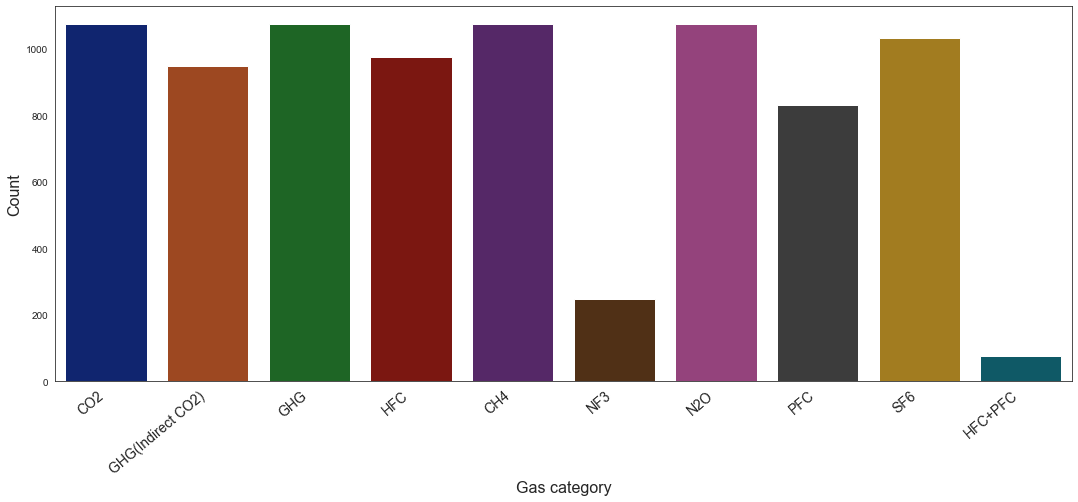

In [25]:
plt.figure(figsize=(15,7))
ax = sns.countplot(replaced_emission["category"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
plt.tight_layout()
plt.xlabel("Gas category",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.rcParams["figure.figsize"] = [15, 10]
plt.show()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [26]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [27]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [28]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [29]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [30]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [31]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [32]:
new_dataframe_emission

,category,Total Amount Emitted(In Kilotones)
2,GHG,5.851885e+08
3,GHG(Indirect CO2),5.574527e+08
1,CO2,4.640204e+08
0,CH4,7.872711e+07
6,N2O,3.213675e+07
4,HFC,7.272892e+06
8,PFC,1.515173e+06
9,SF6,1.243163e+06
5,HFC+PFC,2.448399e+05
7,NF3,2.813987e+04


**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

*Lets try another approach*

In [33]:
replaced_emission.head()

,country_or_area,year,value,category,Total Emitted Gas
0,Australia,2014,393126.946994,CO2,4.640204e+08
1,Australia,2013,396913.936530,CO2,4.640204e+08
2,Australia,2012,406462.847704,CO2,4.640204e+08
3,Australia,2011,403705.528314,CO2,4.640204e+08
4,Australia,2010,406200.993184,CO2,4.640204e+08


In [34]:
Australia_data = replaced_emission[replaced_emission["country_or_area"]=="Australia"].groupby(["category","year"],as_index = False)

In [35]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [36]:
data_div.head(10)

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   
                1995  109900.735111  305162.543549  433478.650826   
                1996  109185.337720  311914.819824  439803.962228   
                1997  111898.854749  320439.116819  451721.717815   
                1998  111427.929806  334328.142647  466382.112472   
                1999  107889.224971  343713.906948  472245.990778   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   
                1995  433478.650826      1004.032111 NaN       15578.196408   
                1996  439803.962228      414.170638  NaN       16609.586778   
                1997  451721.717815      705.228318  NaN       17201.890783   
                1998  466382.112472      998.289580  NaN       17743.913106   
                1999  472245.990778      1374.293110 NaN       17933.439790   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896  
                1995 NaN   1530.835665  302.307983  
                1996 NaN   1410.395058  269.652210  
                1997 NaN   1228.150898  248.476248  
                1998 NaN   1660.518820  223.318513  
                1999 NaN   1139.058757  196.067201

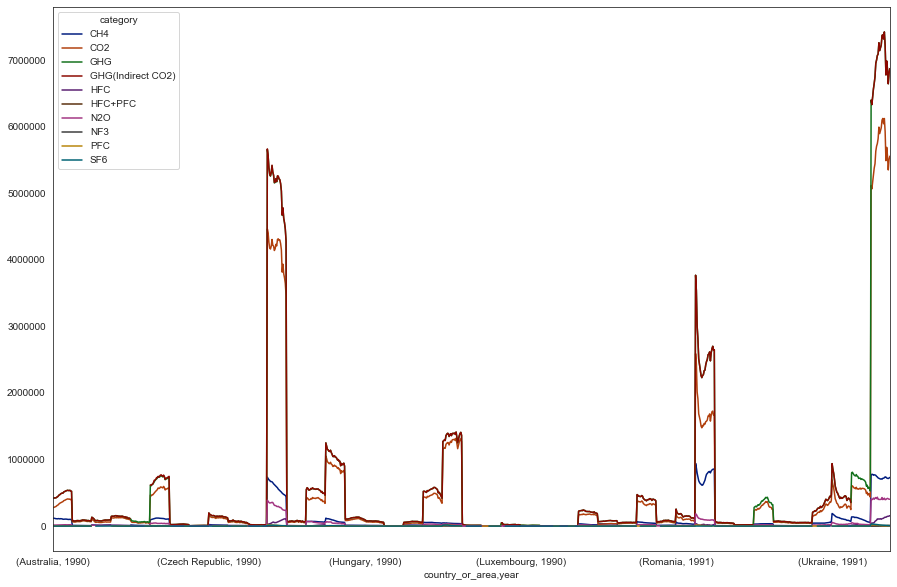

In [37]:
data_div.plot()

This doesn't depict the correct info and looks like a mess

Next Notebook - **PLOTTING DATA COUNTRWISE**